In [1]:
import h5py
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np

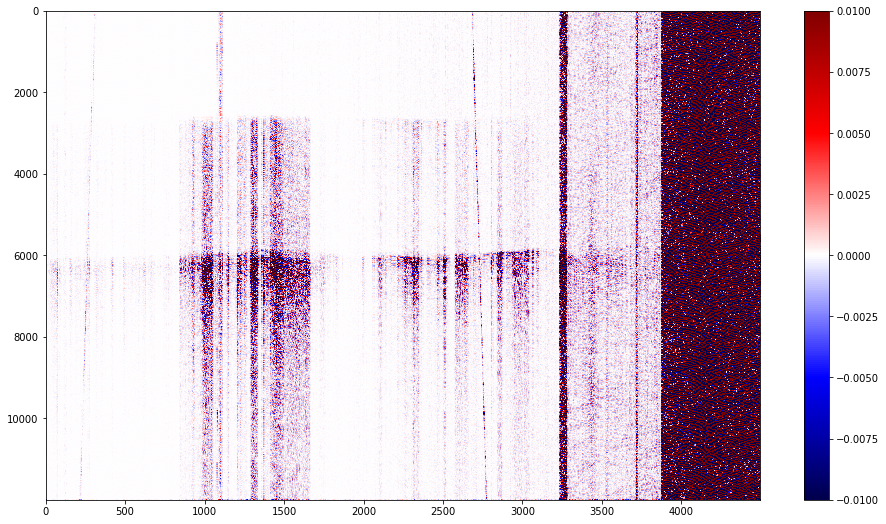

In [7]:
file = 'decimator_2023-12-24_15.14.00_UTC.h5'

data = h5py.File(file)
attrs=dict(data['Acquisition'].attrs)
das = np.array(data['Acquisition/Raw[0]/RawData'])
time = np.array(data['Acquisition/Raw[0]/RawDataTime'])
data.close()
dt = 1/attrs['MaximumFrequency']/2
dx = attrs['SpatialSamplingInterval']

b,a = butter(2,10,'high',fs=das.shape[0]/60)
data_hf = filtfilt(b,a,das,axis=0)
vm = 0.01
plt.subplots(figsize=(16,9))
c=plt.imshow(data_hf,aspect='auto',cmap='seismic',vmin=-vm,vmax=vm)
plt.colorbar(c)
# plt.savefig(file+'.png')
plt.show()